# 2018-01-29 Econ 101b Problem Set 4

probem set will be due Wed Feb 7...
Section between Tu & Th lecture will be problem set section...

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

/Users/delong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

**Task 1: Using information sources**:

1. Websurf your way over to https://gapminder.org/tools
2. Choose a non-U.S. country of interest to you. Select it and the U.S. by clicking on the checkboxes in the country list that should be visible.
3. Pull the slider to the right of the "play" button all the way back to the left.
4. Press the "play" button and watch the two countries—the one you selected, and the U.S.—make tracks over the past.
5. Take a screenshot of the resulting figure when the animation has finished.
6. Upload that screenshot to a URL somewhere on the internet.
7. Display that screenshot in the markdown cell below using an <img src="" /> tag
8. Write a paragraph: What do you learn about economic growth roughly since the Industrial Revolution from the figure you have screenshotted?

----

**Task 2: Reversals of Fortune**:

This problem requires you to edit the second Python code cell below. The first cell downloads data and plots Argentinean and Swedish levels of GDP per capita since 1890. Run this first cell. Then...



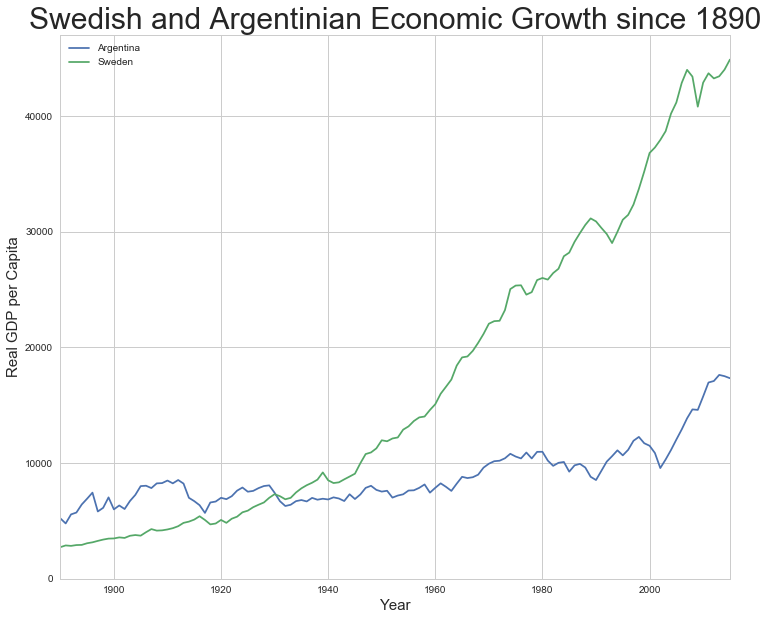

In [4]:
# time series for measured real national product per capita for 
# Sweden and Argentina since 1890, plus source notes, accessible 
# in the argentina_sweden_dict object for later use, if needed...

sourceURL = "http://delong.typepad.com/2017-08-11-argentina-and-sweden-gdp-per-capita-1890-2015-from-gapminder.org.csv"
argentina_sweden_df = pd.read_csv(sourceURL, index_col = 0)

argentina_sweden_dict = {}
argentina_sweden_dict["df"] = argentina_sweden_df
argentina_sweden_dict["sourceURL"] = sourceURL
argentina_sweden_dict["sourceDescription"] = "Hans Rosling's Gapminder: http://gapminder.org"   
argentina_sweden_dict["sourceNotes"] = "From Gapminder World data page: http://www.gapminder.org/data/"

argentina_sweden_dict["df"].plot()

plt.ylim(0, )
plt.xlabel("Year", size = 15)
plt.ylabel("Real GDP per Capita", size = 15)
plt.title("Swedish and Argentinian Economic Growth since 1890", size = 30)

In [5]:
# Possible Exercises: 
# -------------------
#
# 1. Calculate and print the year that Sweden surpasses Argentina
# 2. Calculate and print the 20-year period over which Sweden's growth
#    rate was slowest
# 3. Calculate and pritn the 20-year period over which Argentina's
#    growth rate was fastest
# 4. Do you get the same impression of relative economic success and
#    disappointment if you plot not the levels but the logs of GDP
#    per capita alongside each other?

## Calculate the difference in growth multiples between Sweden and
## Argentina since 1890

# Sweden's measured growth multiple over 1890-2015:

Sweden_multiple18902015 = argentina_sweden_df.Sweden[2015]/argentina_sweden_df.Sweden[1890]

# Argentina's measured growth multiple over 1890-2015:

Argentina_multiple18902015 = argentina_sweden_df.Argentina[2015]/argentina_sweden_df.Argentina[1890]

print("Sweden's growth multiple over 1890-2015:", Sweden_multiple18902015)
print("Argentinas growth multiple over 1890-2015:", Argentina_multiple18902015)

Sweden's growth multiple over 1890-2015: 16.4138939671
Argentinas growth multiple over 1890-2015: 3.31752104055


----

**Task 3: The basics of the Solow growth model**:

In the (markdown) cell below this one, answer the questions asked:

1. What are the _economic variables_ in the Solow growth model? List their symbols, and describe what they are:

2. What are the _parameters_ in the Solow growth model? List their symbols, and describe what they are:

3. What are the _behavioral relationships_ in the Solow growth model?

4. What is the _equilibrium condition_ in the Solow growth model? 

----

**Task 4: The Cobb-Douglas Production Function**



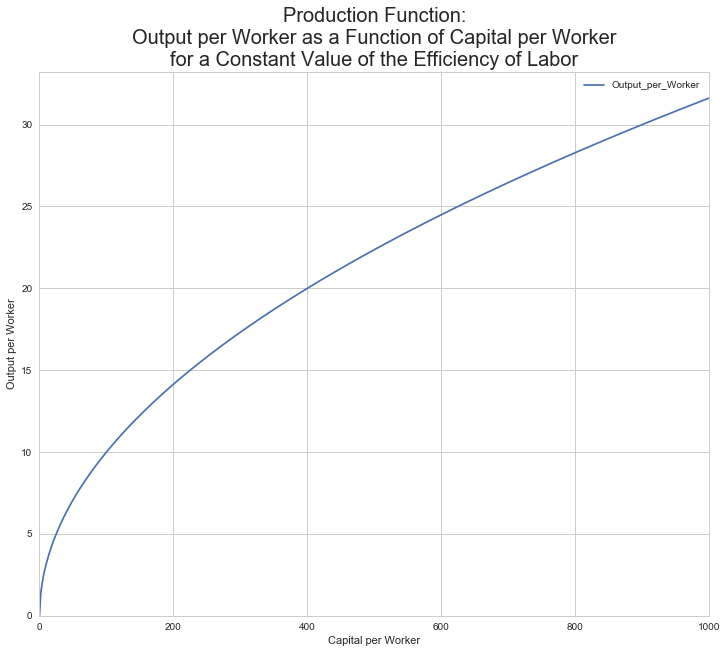

In [6]:
# what the Cobb-Douglas production function looks like
#
# Possible Exercises: 
# -------------------
#
# 1. Change the value of the parameter α in the production function:
#    what does it look like if α = 0, 1/3, 2/3, 1, respectively? (Change
#    the value of α by altering the right-hand side of the "alpha = 0.5"
#    line of code)
# 2. Change the value of the efficiency of labor E in the production
#    function. How would the production function be changing over 
#    time if the efficiency of labor were growing over time? (Change
#    the value of the efficiency of labor E by altering the right-hand 
#    side of the "alpha = 0.5" line of code)
# 3. Look out over a larger or different domain: let K/L vary not over
#    [0, 1000] but over some other set of values. (Change the lowest
#    value of K/L examined by changing the "lowestkoverl = 0" line of
#    code; change the spread of the values of K/L examined by changing
#    the "output_per_worker[i, 0] = lowestkoverl + 2 * i" line of code.) 

alpha = 0.5
E = 1

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
plt.title(str1 + "\n" + str2 + "\n" + str3, size = 20)

----

**Task 5: Plotting the Cobb-Douglas Production Function II**:

(0, 140.43546404504863)

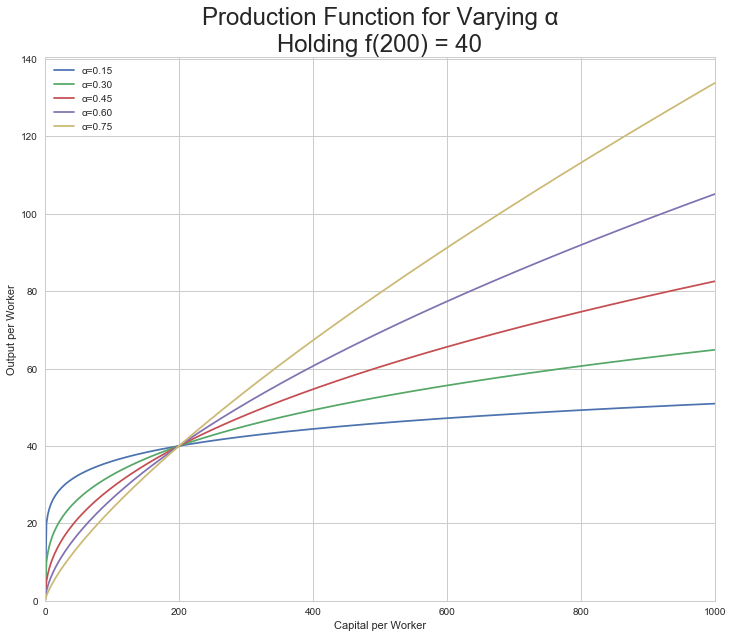

In [7]:
# calculations for Figure 4.6

E = 40

for a in range(5):
    output_per_worker = np.zeros((501, 2))
    alpha = 0.15 * (a + 1)
    for i in range(501):
        output_per_worker[i, 0] = 2 * i
        output_per_worker[i, 1] = ((output_per_worker[i, 0] ** alpha) * E / 
            ((200) ** alpha) )
    output_per_worker_df = DataFrame(data = output_per_worker, 
        columns = ["Capital_per_Worker", "Output_per_Worker"])

    plt.plot(output_per_worker_df.Capital_per_Worker, output_per_worker_df.Output_per_Worker)
    plt.legend(["α=0.15", "α=0.30", "α=0.45", "α=0.60", "α=0.75"])
    
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.title("Production Function for Varying α\nHolding f(200) = 40", size = 24)
plt.xlim(0, 1000)
plt.ylim(0, )

----

**Task 6: Using the Cobb-Douglas Production Function**:

Given values for the diminishing-returns-to-investment parameter α, the efficiency of labor E, the economy’s capital stock K, and the labor force L, we can calculate the level of output per worker Y/L in the economy.

Suppose we know that the current value of the efficiency of labor E is 10,000 a year and that the diminishing-returns-to-investment parameter α is 0.3. Then determining how the level of output per worker Y/L depends on the capital stock per worker K/E is straightforward.

Let’s start with the case in which the capital stock per worker is 125,000. The Cobb-Douglas production function is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{L}\right)^α\left(E\right)^{1-α}  $

Substitute in the known values of K/L, E, and α to get:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left({125000}\right)^{0.3}\left(10000\right)^{1-0.3}  $

Use your calculator—who do I think I am fooling? Nobody has a calculator anymore—smartphone or larger computer to evaluate the effect of raising these numbers to these exponents to get:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(33.81\right)\left(630.96\right)  $

And then multiply to get:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = 21333.92  $

If we are interested in a capital stock per worker level of &dollar;250,000, the calculations are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left({250000}\right)^{0.3}\left(10000\right)^{1-0.3}  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(41.63\right)\left(630.96\right)  $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = 26266.86  $

Note that the first 125,000 of capital per worker boosted output per worker from 0 to 21,334, while the second &dollar;125,000 of capital per worker boosted output per worker only from 21,334 to 26,265—by less than one-quarter as much. These substantial diminishing returns to investment should come as no surprise: The value of α is quite low at 0.3, and low values of a produce rapidly diminishing returns to capital accumulation.

This example offers another important lesson: Keep your calc... your personal information technology device handy! Nobody expects anyone to raise 250,000 to the 0.3 power in her or his head and come up with 41.63. The Cobb-Douglas form of the production function, with its fractional exponents, carried the drawback that students (or professors) can do problems in their heads or with just pencil and paper only if the problems have been carefully rigged beforehand. Nevertheless, we used the Cobb-Douglas production function because of its convenience: by varying just two parameters we can fit the model to an enormous variety of potential economic situations.

And in the infotech age that inconvenience is no longer a significant inconvenience.

----

**Task 7: Equilibrium Output per Worker Graphically**



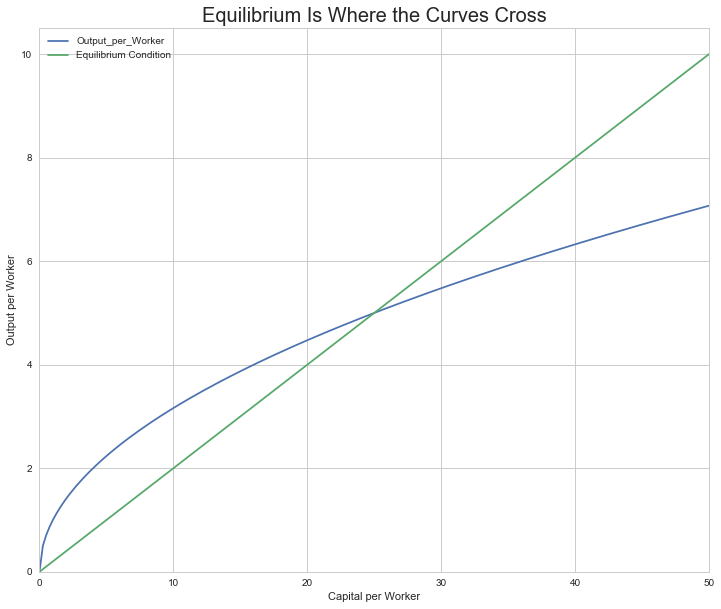

In [8]:
delta = 0.03
s = 0.15
alpha = 0.5
E = 1

output_per_worker = np.zeros((201, 3))

for i in range(201):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + i/4
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
    output_per_worker[i, 2] = delta/s * output_per_worker[i, 0]
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker", 
        "Equilibrium Condition"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

plt.title("Equilibrium Is Where the Curves Cross", size = 20)

----

### Problem Set 5 (Feb 14)

**Task 8: Getting a Sense of How the Solow Growth Model Behaves Via Simulation**

In [9]:
# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...

def sgm_200yr_run(L0, E0, K0, n=0, g=0, s=0.15, alpha=0.5, delta=0.03):

    sg_df = pd.DataFrame(index=range(200),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

    for i in range(200):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(3,2,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")

    ax4 = plt.subplot(3,2,4)
    sg_df.Output.plot(ax = ax4, title = "Output")

    ax5 = plt.subplot(3,2,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")

    ax6 = plt.subplot(3,2,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: 200-Year Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate")
    print(g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")




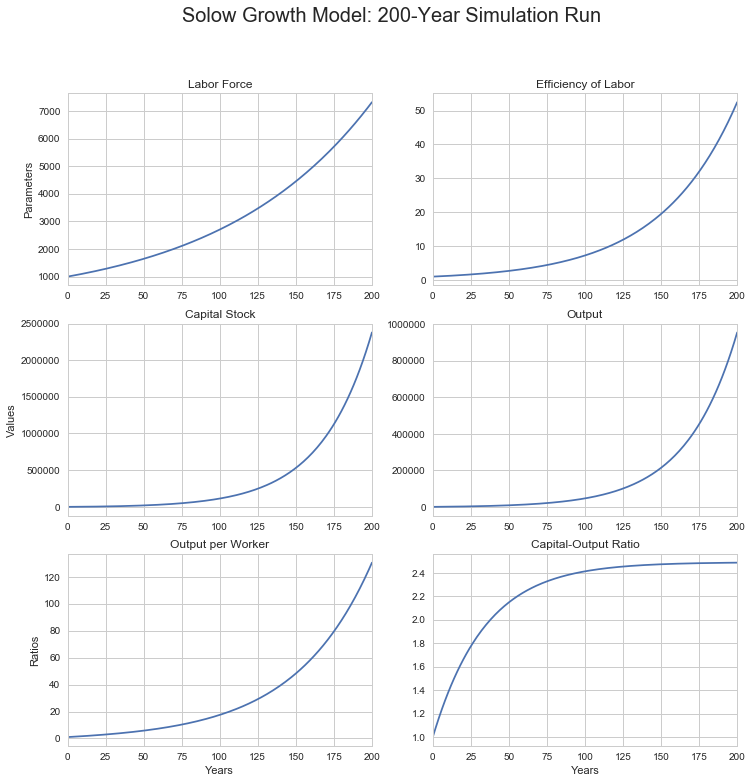

0.01 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.15 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [10]:
# Now let's start with a low initial capital stock, and with
# growth in workers and in efficiency...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 1000, g = 0.02, n = 0.01,
    s = 0.15)

**Task 9: The Effects of a Jump in the Savings Rate**:

----

&nbsp;

**Task 10: Forecasting the Future**

----

&nbsp;

### 4.3.2.2 The Balanced Growth Capital-Output Ratio

But at what value will the economy’s capital-output ratio be constant? Here is where allowing n and g to take on values other than 0 matters. The capital-output ratio will be constant—and therefore we’ll be in balanced-growth equilibrium — when K/Y = s/(n + g + δ). Add up the economy’s labor-force growth rate, efficiency-of-labor growth rate, and depreciation rate; divide the saving-investment rate by that sum; and that is your balanced-growth equilibrium capital-output ratio.

Why is s/(n + g + δ) the capital-output ratio in equilibrium? Think of it this way: Suppose the economy is in balanced growth. How much is it investing? There must be investment equal to δK to replace depreciated capital. There must be investment equal to nK to provide the extra workers in the labor force, which is expanding at rate n, with the extra capital they will need. And, since the efficiency of labor is growing at rate g, there must be investment equal to gK in order for the capital stock to keep up with increasing efficiency of labor.

Adding these three parts of required investment together and setting the sum equal to the gross investment sY actually going on gets us (n + g + δ)K = sY as a condition for capital and output to be in balance. Thus the economy’s investment requirements for balanced growth equal the actual flow of investment when:

(4.3.1)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K}{Y} = \frac{s}{n+g+δ}  $

This is the balanced-growth equilibrium condition. When it is attained, what the capital-output ratio K/Y will be is constant because s, n, g, and δ are all constant. So when there is balanced growth—when output per worker Y/L and capital per worker K/L are growing at the same rate—the capital-output ratio K/Y will be constant. If the capital-output ratio K/Y is lower than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be less than investment (sY), so the capital-output ratio will grow. It will keep growing until K/Y reaches s/(n + g + &delta;). If the capital-output ratio K/Y is greater than s/(n + g + &delta;), then depreciation (&delta;K) plus the amount (n + g)K that capital needs to grow to keep up with growing output will be greater than investment (sY), so the capital-output ratio will shrink. It will keep shrinking until K/Y falls to s/(n + g + &delta;). 

----

&nbsp;

### Off the Balanced Growth Path

To calculate what output per worker would be if the economy were to be on its balanced-growth path is a straightforward three-step procedure:

1. Calculate the balanced-growth equilibrium capital-output ratio s/(n + g + δ), the saving rate s divided by the sum of the labor-force growth rate n, the efficiency of labor growth rate g, and the depreciation rate δ.
2. Raise the balanced-growth capital-output ratio to the α/(l-α) power, where α is the diminishing-retums-to-investment parameter in the production function. 
3. Multiply the result by the current value of the efficiency of labor E. The result is the current value of what output per worker would be if the economy were on its balanced growth path, and the path traced out by that result as E grows over time is the balanced-growth path for output per worker.

But is this of use if the economy is not on its balanced growth path?

How can we use a model which assumes that the economy is on its balanced-growth path to analyze a sit  uation in which the economy is not on that path? We still can use the model—and this is an important part of the magic of economics—because being on the balanced-growth path is an equilibrium condition. In an economic model, the thing to do if an equilibrium condition is not satisfied is to wait and, after a while, look again. When we look again, it will be satisfied.
Whenever the capital-output ratio K/Y is above its balanced-growth equilibrium value s/(n + g + δ), K/Y is falling: Investment is insufficient to keep the capital stock growing as fast as output. Whenever K/Y is below its balanced-growth equilibrium value, K/Y is rising: Capital stock growth outruns output. And as the capital-output ratio converges to its balanced-growth value, so does the economy’s level of output per worker converge to its balanced-growth path.

The fact that an economy converges to its balanced-growth path makes analyzing the long-run growth of an economy relatively easy as well even when the economy is not on its balanced-growth path:

1. Calculate the balanced-growth path.
2. From the balanced-growth path, forecast the future of the economy: If the
economy is on its balanced-growth path today, it will stay on that path in the future (unless some of the parameters—n, g, δ, s, and α—change).
3. If those parameters change, calculate the new, shifted balanced-growth path and predict that the economy will head for it.
4. If the economy is not on its balanced-growth path today, it is heading for that path and will get there eventually.

Thus _long run_ economic forecasting becomes simple. All you have to do is predict that the economy will head for its balanced-growth path, and calculate what the balanced-growth path is.

How fast does an economy head for its balanced-growth path? Does the convergence of an economy following the Solow growth model to its balanced-growth path take a year, or five years, or is it a matter of decades?

It is a matter of decades. But to see this requires more algebra:

Those of you for whom calculus is a tool and an intellectual force multiplier rather than a ritualistic obstacle to thought can start with the output form of the production function:

(4.3.8)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = K^α(EL)^{(1-α)}

and take first logarithms nad then derivatives of both sides to obtain:

(4.3.9)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$\frac{Y _{t}}{L _{t}} = \left(\frac{K _{t}}{L _{t}}\right)^{\alpha} \left(L_{t}\right) \left(E_{t}\right)^{1 - \alpha}$

and note that since the derivative of a logarithm is simply a proportional growth rate, that (4.3.9) is an equation that tells us that—on or off of the balanced-growth path—the proportional growth rate of output is a function of the parameter α and of the growth rates of the capital stock, the labor force, and the efficiency of labor.

To keep those of you for whom it is not so on the same page, we are simply going to write "g<sub>x</sub>" for the proportional growth rate of an economic variable X, so that g<sub>Y</sub> is the proportional growth rate of output Y g<sub>K</sub> is the proportional growth rate of the capital stock K, and so forth. And we will then write (4.3.9) in the friendlier form of an equation about growth rates, and say that this equation is true because it is built into the definitions of logarithms, proportional growth rates, and the Cobb-Douglas production function:

(4.3.9')&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_Y = αg_K + (1-α)g_L + (1-α)gE  $

But we know what the proportional growth rates of the labor force L and labor efficiency E are in the Solow model: they are n and g:

(4.3.10)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_Y = αg_K + (1-α)(n + g)  $

Now let's subtract both sides of this from the growth rate of the capital stock"
(4.3.11)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_K - g_Y = (1-α)g_K - (1-α)(n + g)  $

And in order to determine what the growth rate of the capital stock is, we simply take its change sY - δK and divide it by its level K—but only on the right hand side:

(4.3.12)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_K - g_Y = (1-α)\left(s\left(\frac{Y}{K}\right) - δ\right) - (1-α)(n + g)  $

Now we know that the proportional growth rate of the quotient of two variables is just the difference between the proportional growth rates of the numerator and the denominator, so we can write the left hand side as:

(4.3.13)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ g_{K/Y} = (1-α)s\left(\frac{Y}{K}\right) - (1-α)(n + g + δ)  $

And since the proportional growth rate of a variable is its rate of change divided by its level, the left hand side is:

(4.3.14)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)/dt}{K/Y} = (1-α)s\left(\frac{Y}{K}\right) - (1-α)(n + g + δ)  $

Getting rid of the denominator on the left-hand side:

(4.3.15)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)}{dt} = (1-α)s - (1-α)(n + g + δ)\left(\frac{K}{Y}\right)  $

(4.3.16)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d(K/Y)}{dt} = - (1-α)(n + g + δ)\left(\frac{K}{Y} - \frac{s}{n + g + δ}\right)  $

Equation (4.3.16) is a very special equation: it has a rate of change of something on the left hand side. It has the level of something on the right hand side. It has a negative constant multiplying the level. It is a _convergent exponential_. The function that satisfies this equation is:

(4.3.17)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \frac{s}{\delta + n + g} + \left(C - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}  $

for the appropriate constant C. What is the value of this constant C? Well, we know what the capital-output ratio is right now, when we start our analysis, which we might as well take to be the time t = 0. If we do take now to be time t = 0, and take K<sub>0</sub>/Y<sub>0</sub> for the capital output tday, then we can substitute in for the constant C:

(4.3.18)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{K_t}{Y_t} = \frac{s}{\delta + n + g} + \left(\frac{K_0}{Y_0} - \frac{s}{\delta + n + g}\right) e^{-(1 - \alpha)(\delta + g + n)t}  $

This tells us that, when it is off the equilibrium balanced-growth path, the capital-output ratio of a Solow growth model economy is a weighted average of (a) its initial capital-output ratio K<sub>0</sub>/Y<sub>0</sub> and (b) its long-run balanced-growth capital-output ratio s/(n+g+δ), with the weight placed on the first declining exponentially according to the function exp(-(1-α)(n + g + δ)t)

This tells us that, in the Solow growth model, an economy will close a fraction (1 — α)(n + g + δ) of the gap between its current position and the balanced-growth path each year. If (1 — α)(n + g + δ) turns out to be equal to 0.05, the capital-output ratio will close 5 percent of the gap between its current level and its balanced-growth value each year. It would close half of the gap in fourteen years. It would close three-quarters of the gap in 28 years.

The Solow growth model is thus definitely a long-run model. It predicts that in the short run things will pretty much stay as they have been. If that is not right—if there are interesting and important fluctuations in the short run—the Solow model knows nothing about them. For them we will have to turn to the models of Chapter 6 and beyond.

----

&nbsp;

**Task ?: West Germany and Convergence**:

The Return of the West German Economy to Its Balanced-Growth Path Economies do converge to and then remain on their balanced-growth paths. The West German econ  omy after World War II is a case in point.
Source: J. Bradford DeLong and Barry Eichengreen, "The Marshall Plan: History's Most Successful Structural Adjustment Programme," in Rudiger Dornbusch, Willhelm Nolling, and Richard Layard, eds., Postwar Economic Reconstruction and Lessons for the East Today (Cambridge, MA: MIT Press, 1993), pp. 189-230.

We can see such convergence in action in many places and times. For example, consider the post-World War II history of West Germany. The defeat of the Nazis left the German economy at the end of World War II in ruins. Output per worker was less than one-third of its prewar level. The economy’s capital stock had been wrecked and devastated by three years of American and British bombing and then by the ground campaigns of the last six months of the war. But in the years immediately after the war, the West German economy’s capital-output ratio rapidly grew and con  verged back to its prewar value. As Figure 4.11 shows, within 12 years the West German economy had closed half the gap back to its pre-World War II growth path. And within 30 years the West German economy had effectively closed the entire gap between where it had started at the end of World War II and its balanced-growth path.

----

&nbsp;

## 4.4.1 Jumps in Parameter Values

What if one or more of the parameters in the Solow growth model  were to suddenly and substantially shift? What if the labor-force growth rate were to rise, or the rate of technological progress to fall? 

One principal use of the Solow growth model is to analyze questions like these: how changes in the economic environment and in economic policy will affect an econ  omy’s long-run levels and growth path of output per worker Y/L.

Let’s consider, as examples, several such shifts: an increase in the growth rate of the labor force n, a change in the economy’s saving-investment rate s, and a change in the growth rate of labor efficiency g. All of these will have effects on the balanced- growth path level of output per worker. But only one—the change in the growth rate of labor efficiency — will permanently affect the growth rate of the economy.

## 4.4.3 The Saving Rate and the Price of Capital Goods

The most frequent sources of shifts in the parameters of the Solow growth model are shifts in the economy’s saving-investment rate. The rise of politicians eager to promise goodies — whether new spending programs or tax cuts — to voters induces large government budget deficits, which can be a persistent drag on an economy’s saving rate and its rate of capital accumulation. Foreigners become alternately overoptimistic and overpessimistic about the value of investing in our country, and

 so either foreign saving adds to or foreign capital flight reduces our own saving- investment rate. And changes in households’ fears of future economic disaster, in households’ access to credit, or in any of numerous other factors change the share of household income that is saved and invested as well.
 
What effects do changes in saving rates have on the balanced-growth path lev  els of Y/L? The higher the share of national product devoted to saving and gross investment — the higher is s — the higher will be the economy’s balanced-growth capital-output ratio s/(n + g + 5). Why? Because more investment increases the amount of new capital that can be devoted to building up the average ratio of cap  ital to output. Double the share of national product spent on gross investment, and you will find that you have doubled the economy’s capital intensity, or its average ratio of capital to output.

One way to think about this is that the equilibrium is the point at which the economy’s investment effort and its investment requirements are in balance. Invest  ment effort is simply s, the share of total output devoted to saving and investment. Investment requirements are the amount of new capital needed to replace depre  ciated and worn-out machines and buildings, plus the amount needed to equip new workers who increase the labor force, plus the amount needed to keep the stock of tools and machines at the disposal of workers increasing at the same rate as the efficiency of their labor. So double the saving rate and you double the balanced-growth capital-output ratio, as seen in Box 4.8.

----

&nbsp;